In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from operator import itemgetter


relevance_cs_to_maths = np.loadtxt("relevance_matrix_cs_to_maths_new.txt")
relevance_maths_to_cs = np.loadtxt("relevance_matrix_maths_to_cs_new.txt")

with open("cs_taxonomy_leaves.txt") as fn:
    cs_leaves = [l.strip() for l in fn]

with open("maths_taxonomy_leaves_new.txt") as fn:
    maths_leaves = [l.strip() for l in fn]



In [2]:
relevance_cs_to_maths.shape, relevance_maths_to_cs.shape

((317, 343), (343, 317))

In [3]:
n_pairs = len(cs_leaves) * len(maths_leaves)

len(cs_leaves), len(maths_leaves), n_pairs


(317, 343, 108731)

In [4]:
np.histogram(relevance_cs_to_maths.flatten(), bins=100)

(array([  57,  103,  253,  567, 1109, 2240, 3582, 5241, 6243, 7453, 7690,
        8054, 7964, 7646, 7012, 6135, 5470, 4590, 4165, 3466, 2912, 2494,
        2166, 1824, 1587, 1368, 1172,  929,  771,  691,  586,  455,  357,
         335,  257,  241,  195,  163,  160,  130,  108,   95,   94,   64,
          59,   43,   44,   36,   34,   32,   32,   17,   11,   15,   18,
          15,   11,   12,    7,   10,    6,   10,    9,    6,    8,    8,
           5,    8,    5,    5,    4,    3,    7,    3,    6,    6,    5,
           2,    2,    3,    1,    4,    1,    2,    4,    3,    2,    2,
           2,    0,    1,    1,    2,    2,    2,    0,    0,    0,    0,
           1]),
 array([0.        , 0.00701212, 0.01402425, 0.02103637, 0.0280485 ,
        0.03506062, 0.04207275, 0.04908487, 0.056097  , 0.06310912,
        0.07012125, 0.07713337, 0.0841455 , 0.09115762, 0.09816975,
        0.10518187, 0.112194  , 0.11920612, 0.12621825, 0.13323037,
        0.1402425 , 0.14725462, 0.15426674, 0.

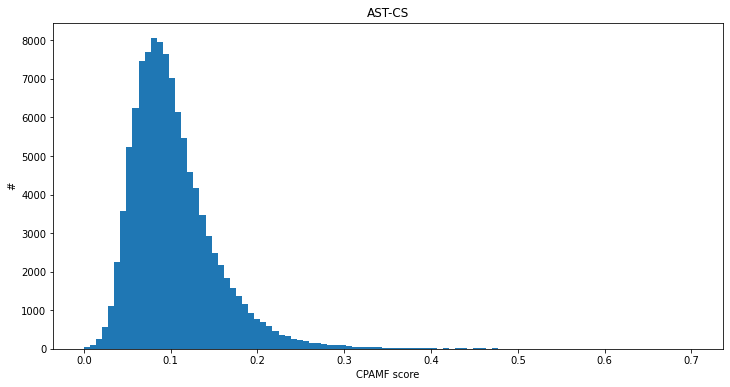

In [5]:
plt.figure(figsize=(12, 6))
plt.hist(relevance_cs_to_maths.flatten(), bins=100)
plt.title("AST-CS")
plt.xlabel("CPAMF score")
plt.ylabel("#")
plt.savefig("hist-ast-cs.png")
plt.show()

In [20]:
np.min(relevance_cs_to_maths), np.max(relevance_cs_to_maths)

(0.0, 0.7012124764965675)

In [6]:
np.quantile(relevance_cs_to_maths.flatten(), 0.99)

0.2708072916666664

In [7]:
q_top100_1 = np.quantile(relevance_cs_to_maths.flatten(), 1 - 100 / n_pairs)
q_top100_1

0.45670051117403593

In [8]:
mask_cs_to_maths = relevance_cs_to_maths > q_top100_1

In [9]:
np.sum(mask_cs_to_maths)

100

In [10]:
sc_to_maths_scores = []
for i in range(len(cs_leaves)):
    for j in range((len(maths_leaves))):
        if mask_cs_to_maths[i][j]:
            sc_to_maths_scores.append((relevance_cs_to_maths[i][j], i, j))
sc_to_maths_scores = sorted(sc_to_maths_scores, key=lambda x: x[0], reverse=True)

print("no\tscore\t Computer Science  -  Mathematics\n")
for no, (score, i, j) in enumerate(sc_to_maths_scores):
    print("{}\t{:.5f}  {}  -  {}".format(no+1, score, cs_leaves[i], maths_leaves[j]))


no	score	 Computer Science  -  Mathematics

1	0.70121  distributed data locking  -  distributed
2	0.66415  quantile regression  -  quantile regression
3	0.65982  evolutionary approach  -  evolution
4	0.65625  relational parallel and distributed dbmss  -  distributed
5	0.65549  wikipedia based semantics  -  semantics
6	0.64976  distributed database recovery  -  distributed
7	0.64855  database recovery  -  database
8	0.64145  gaussian processes  -  gaussian processes
9	0.63141  stochastic differential equations  -  differential equations
10	0.62297  decision diagrams  -  decision
11	0.62240  database views  -  database
12	0.61569  sequential decision making  -  decision
13	0.61181  video search  -  search
14	0.60920  theory of database privacy and security  -  database
15	0.60763  relational database model  -  database
16	0.60266  database query languages  -  database
17	0.59776  database interoperability  -  database
18	0.59732  federated databases  -  database
19	0.59464  desktop searc

In [32]:
list(np.round(list(zip(*sc_to_maths_scores))[0], 3)[:20])


[0.701,
 0.664,
 0.66,
 0.656,
 0.655,
 0.65,
 0.649,
 0.641,
 0.631,
 0.623,
 0.622,
 0.616,
 0.612,
 0.609,
 0.608,
 0.603,
 0.598,
 0.597,
 0.595,
 0.594]

In [11]:
np.histogram(relevance_maths_to_cs.flatten(), bins=100)

(array([  58,  109,  261,  617, 1334, 2490, 4212, 5620, 6647, 7407, 7870,
        7883, 7706, 7390, 6647, 5949, 5286, 4450, 3872, 3329, 2778, 2410,
        2104, 1812, 1492, 1292, 1083,  953,  806,  646,  554,  458,  365,
         365,  291,  250,  189,  169,  154,  130,  123,  117,   86,   83,
          92,   85,   88,   75,   54,   52,   52,   39,   35,   44,   47,
          35,   19,   23,   15,   16,   11,   11,   13,   10,    8,    6,
           5,    7,    3,    0,    3,    3,    3,    1,    5,    3,    2,
           2,    3,    2,    0,    2,    1,    1,    0,    1,    0,    0,
           2,    0,    0,    1,    0,    0,    0,    0,    2,    1,    0,
           1]),
 array([0.        , 0.0072844 , 0.0145688 , 0.0218532 , 0.02913759,
        0.03642199, 0.04370639, 0.05099079, 0.05827519, 0.06555959,
        0.07284398, 0.08012838, 0.08741278, 0.09469718, 0.10198158,
        0.10926598, 0.11655038, 0.12383477, 0.13111917, 0.13840357,
        0.14568797, 0.15297237, 0.16025677, 0.

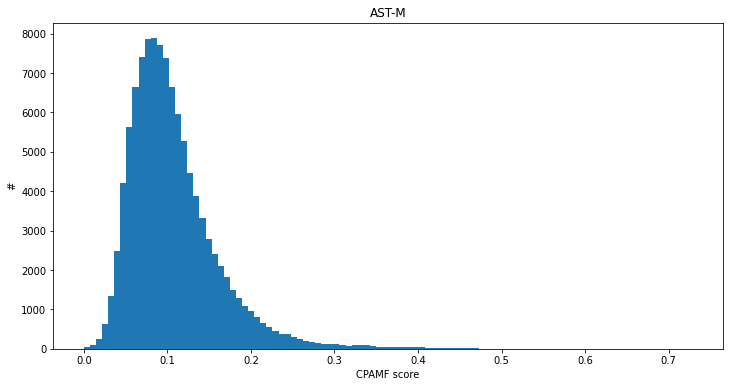

In [12]:
plt.figure(figsize=(12, 6))
plt.hist(relevance_maths_to_cs.flatten(), bins=100)
plt.title("AST-M")
plt.xlabel("CPAMF score")
plt.ylabel("#")
plt.savefig("hist-ast-m.png")
plt.show()

In [21]:
np.min(relevance_maths_to_cs), np.max(relevance_maths_to_cs)

(0.0, 0.7284398455380597)

In [13]:
np.quantile(relevance_maths_to_cs.flatten(), 0.99)


0.30322660686539105

In [14]:
q_top100_2 = np.quantile(relevance_maths_to_cs.flatten(), 1 - 100 / 317 / 350)
q_top100_2

0.4477016413847227

In [15]:
mask_maths_to_cs = relevance_maths_to_cs > q_top100_2

In [16]:
np.sum(mask_maths_to_cs)

98

In [17]:
maths_to_cs_scores = []
for i in range(len(maths_leaves)):
    for j in range((len(cs_leaves))):
        if mask_maths_to_cs[i][j]:
            maths_to_cs_scores.append((relevance_maths_to_cs[i][j], i, j))
maths_to_cs_scores = sorted(maths_to_cs_scores, key=lambda x: x[0], reverse=True)

print("no\tscore\t Mathematics  -  Computer Science\n")
for no, (score, i, j) in enumerate(maths_to_cs_scores):
    print("{}\t{:.5f}  {}  -  {}".format(no+1, score, maths_leaves[i], cs_leaves[j]))


no	score	 Mathematics  -  Computer Science

1	0.72844  knowledge representation  -  representation
2	0.70990  graph intersection representations  -  representation
3	0.70614  signal characterization reconstruction filtering  -  reconstruction
4	0.69954  image processing compression reconstruction information communication  -  reconstruction
5	0.66415  quantile regression  -  quantile regression
6	0.64281  reasoning under uncertainty  -  uncertainty
7	0.64145  gaussian processes  -  gaussian processes
8	0.62625  multivariate distribution statistics  -  multivariate statistics
9	0.60980  parallel numerical computation  -  parallel computation
10	0.60150  order statistics empirical distribution functions  -  distribution functions
11	0.59366  pattern recognition speech recognition  -  speech recognition
12	0.59340  markov processes hypothesis testing  -  markov processes
13	0.58209  data encryption computer  -  data encryption
14	0.57555  testing survival analysis censored data  -  surviv

In [33]:
list(np.round(list(zip(*maths_to_cs_scores))[0], 3)[:20])


[0.728,
 0.71,
 0.706,
 0.7,
 0.664,
 0.643,
 0.641,
 0.626,
 0.61,
 0.601,
 0.594,
 0.593,
 0.582,
 0.576,
 0.572,
 0.57,
 0.569,
 0.561,
 0.561,
 0.56]